# Défi open data : Energies renouvelables

En 2022, les énergies renouvelables représentaient 20,7% de la consommation finale brute d’énergie, avec un objectif fixé à 33% d’ici 2030 ([loi relative à l’énergie et au climat](https://www.legifrance.gouv.fr/dossierlegislatif/JORFDOLE000038430994/)). En effet, la production d’énergies renouvelables constitue un levier dans la diversification du mix énergétique, la réduction des émissions de gaz à effet de serre et l’atténuation du changement climatique.

Dès lors, il est nécessaire de composer avec **la production variable et discontinue (puisque dépendante des conditions météorologiques) de certaines énergies renouvelables (éolien, solaire)**.

**La problématique**

Ce projet vous propose de **prévoir les variations de production d’énergies renouvelables (éolien et/ou solaire, au choix) à l’échelle nationale ou d’une région de votre choix**.

Beaucoup de données ouvertes sont mises à disposition pour vous permettre de répondre à ce sujet. Plusieurs jeux de données ont déjà été chargés dans cet environnement ([cf. liste](https://defis.data.gouv.fr/defis/6639e311f4a75be320cfa517/)) et vous pouvez bien évidemment en ajouter d’autres selon vos besoins.

Une fois vos travaux terminés, partagez-les avec l’ensemble de la communauté [en publiant une réutilisation sur data.gouv.fr](https://guides.data.gouv.fr/guide-data.gouv.fr/reutilisations) !

# Importer des données
Nous mettons à disposition une fonction utilitaire qui permet de charger la majorité des ressources de data.gouv.fr à partir de leur identifiant sur le site (exemple : `"2876a346-d50c-4911-934e-19ee07b0e503"`). Vous pouvez l'utiliser comme suit :

In [1]:
from utils import load_table_from_resource_id

df = load_table_from_resource_id('3fe86dcd-76be-4770-90b2-089c92af0d3b')
df

,date,heure,prod_eolienne_mwh,prod_solaire_mwh
0,2023-08-01,03:00,11009.0,0.0
1,2023-08-01,10:00,8160.0,3137.0
2,2023-08-01,18:00,9863.0,2495.0
3,2023-08-01,20:00,7215.0,268.0
4,2023-08-01,21:00,6749.0,9.0
...,...,...,...,...
37217,2024-04-30,01:00,3778.0,1.0
37218,2024-04-30,13:00,3717.0,4544.0
37219,2024-04-30,16:00,4164.0,3530.0
37220,2024-04-30,17:00,4130.0,2783.0


# Exemple de réalisation : échanges physiques de la France

In [23]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [31]:
# on récupère les données de l'ODRE
df = pd.read_csv(
    'https://odre.opendatasoft.com/api/explore/v2.1/catalog/datasets/eco2mix-national-tr/exports/csv',
    sep=';'
)
df = df.dropna(subset='consommation')
df['date'] = pd.to_datetime(df['date'])
df

,perimetre,nature,date,heure,date_heure,consommation,prevision_j1,prevision_j,fioul,charbon,...,gaz_ccg,gaz_autres,hydraulique_fil_eau_eclusee,hydraulique_lacs,hydraulique_step_turbinage,bioenergies_dechets,bioenergies_biomasse,bioenergies_biogaz,stockage_batterie,destockage_batterie
0,France,Données temps réel,2023-09-02,13:30,2023-09-02T11:30:00+00:00,43692.0,43000.0,43700.0,118.0,15.0,...,656.0,0.0,3233.0,433.0,85.0,59.0,367.0,250.0,-6,1
1,France,Données temps réel,2023-09-02,15:45,2023-09-02T13:45:00+00:00,40721.0,40150.0,40950.0,118.0,14.0,...,465.0,0.0,3283.0,446.0,111.0,60.0,365.0,250.0,-4,5
2,France,Données temps réel,2023-09-02,19:00,2023-09-02T17:00:00+00:00,40987.0,41400.0,41100.0,118.0,15.0,...,2175.0,0.0,3160.0,1663.0,1131.0,64.0,366.0,250.0,-18,4
3,France,Données temps réel,2023-09-02,22:45,2023-09-02T20:45:00+00:00,40783.0,41400.0,40745.0,119.0,15.0,...,1759.0,0.0,3362.0,1771.0,1654.0,81.0,367.0,250.0,-4,1
4,France,Données temps réel,2023-09-02,23:15,2023-09-02T21:15:00+00:00,40003.0,42050.0,41190.0,119.0,19.0,...,1691.0,0.0,3347.0,1816.0,1396.0,81.0,368.0,250.0,-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47370,France,Données temps réel,2024-06-06,09:15,2024-06-06T07:15:00+00:00,45931.0,47100.0,46050.0,117.0,0.0,...,113.0,0.0,6038.0,2298.0,2198.0,191.0,353.0,244.0,-3,0
47371,France,Données temps réel,2024-06-06,10:00,2024-06-06T08:00:00+00:00,46856.0,47600.0,47300.0,117.0,0.0,...,113.0,0.0,6118.0,2116.0,704.0,195.0,355.0,244.0,-3,2
47372,France,Données temps réel,2024-06-06,12:00,2024-06-06T10:00:00+00:00,48826.0,48700.0,49500.0,116.0,0.0,...,116.0,0.0,5731.0,1592.0,417.0,195.0,353.0,244.0,-3,0
47373,France,Données temps réel,2024-06-06,13:00,2024-06-06T11:00:00+00:00,48413.0,49600.0,50100.0,116.0,0.0,...,114.0,0.0,5662.0,1535.0,311.0,193.0,351.0,244.0,0,4


In [54]:
# on calcule les statistiques quotidiennes pour une variable
var = 'ech_comm_angleterre'
stats = df.groupby('date')[var].mean().reset_index()
stats['year'] = stats['date'].dt.year
stats['day'] = stats['date'].apply(lambda d: d.replace(year=2000))
stats

,date,ech_comm_angleterre,year,day
0,2023-02-01,86.333333,2023,2000-02-01
1,2023-02-02,1050.875000,2023,2000-02-02
2,2023-02-03,-921.750000,2023,2000-02-03
3,2023-02-04,-3527.791667,2023,2000-02-04
4,2023-02-05,-3311.791667,2023,2000-02-05
...,...,...,...,...
487,2024-06-02,-2997.750000,2024,2000-06-02
488,2024-06-03,-3408.333333,2024,2000-06-03
489,2024-06-04,-3445.083333,2024,2000-06-04
490,2024-06-05,-3470.125000,2024,2000-06-05


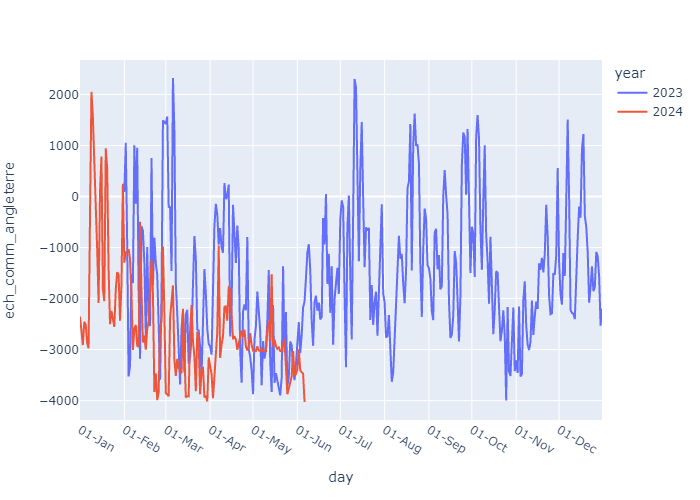

In [56]:
fig = px.line(
    stats,
    x='day',
    y=var,
    color='year',
)
fig.update_layout(
    xaxis={
        "dtick": "M1",
        "tickformat": "%d-%b"
    }
)
fig.show(
#     renderer='png'
)